In [363]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
torch.manual_seed(42)

In [365]:
df=pd.read_csv('fmnist_small.csv')
df.shape


(6000, 785)

In [366]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [367]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [368]:
#train test split
x_train, x_test, y_train , y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [369]:
#scaling the data
#always divide by float
x_train=x_train/255.0
x_test=x_test/255.0

In [370]:
#creating dataset class
class customDataset(Dataset):
    def __init__(self,features, labels):
        self.features=torch.tensor(features,dtype=torch.float32)
        self.labels=torch.tensor(labels,dtype=torch.long)
    def __len__(self):
        return self.features.shape[0]
    def __getitem__(self, index):
        return self.features[index],self.labels[index]

In [371]:
#creating train & test dataset
train_dataset= customDataset(x_train,y_train)
test_dataset= customDataset(x_test,y_test)

In [372]:
#creating dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [373]:
#creating nn class
class myNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            #not using softmax on the last layer because cross entropy loss already has it
            nn.Linear(64, 10)
        )
    def forward(self, input_matrix):
        return self.network(input_matrix)

In [374]:
#learning rate and epoch
epochs=100
learning_rate=0.01

In [375]:
#creating model object
model=myNN(x.shape[1])
#Declaring loss function also and mostly called criterion
criterion=nn.CrossEntropyLoss()
#optimizer for parameters update
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [376]:
#training loop
avg_loss_list=[]
epochs_list=[]
for epoch in range(epochs):
    total_epoch_loss=0
    for features, labels in train_dataloader:
        #forward pass
        y_pred=model(features)
        #calculating loss
        loss=criterion(y_pred,labels)
        #resetting the grads to zero  before calculating new
        optimizer.zero_grad()
        #backpropagation (calculating grads)
        loss.backward()
        #updating parameters
        optimizer.step()

        #adding loss from all batches
        total_epoch_loss+= loss.item()
    avg_loss=total_epoch_loss/len(train_dataloader)
    avg_loss_list.append(avg_loss)
    epochs_list.append(epoch)
    print("epoch:",epoch,"avg_loss:",avg_loss)







epoch: 0 avg_loss: 2.236817183494568
epoch: 1 avg_loss: 1.9528840390841167
epoch: 2 avg_loss: 1.4864923119544984
epoch: 3 avg_loss: 1.1698892148335776
epoch: 4 avg_loss: 0.9942735199133556
epoch: 5 avg_loss: 0.8960168143113454
epoch: 6 avg_loss: 0.8343261949221293
epoch: 7 avg_loss: 0.7890070615212122
epoch: 8 avg_loss: 0.7555474537611008
epoch: 9 avg_loss: 0.7287200280030568
epoch: 10 avg_loss: 0.7000736107428869
epoch: 11 avg_loss: 0.6826658391952515
epoch: 12 avg_loss: 0.6608449246486028
epoch: 13 avg_loss: 0.6402002318700155
epoch: 14 avg_loss: 0.6177434605360032
epoch: 15 avg_loss: 0.6091746403773626
epoch: 16 avg_loss: 0.5856800532341003
epoch: 17 avg_loss: 0.5769095105926195
epoch: 18 avg_loss: 0.5645675685008367
epoch: 19 avg_loss: 0.5527894032001496
epoch: 20 avg_loss: 0.5440935349464416
epoch: 21 avg_loss: 0.5340601431330045
epoch: 22 avg_loss: 0.5224643723169963
epoch: 23 avg_loss: 0.517097928126653
epoch: 24 avg_loss: 0.5065705335140228
epoch: 25 avg_loss: 0.500227209230264

In [377]:
#setting model to eval mode
model.eval()

myNN(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [378]:
#evaluation
with torch.no_grad():
    total=0
    correct=0
    for features, labels in test_dataloader:
        y_predT=model(features)
        _,predicted=torch.max(y_predT,1)
        total=total+labels.shape[0]
        correct+= (predicted==labels).sum().item()
print("accuracy:",100*correct/total)


accuracy: 82.41666666666667


In [379]:
#personal analysis
print(features.shape)
print(y_predT.shape)
print(predicted.shape)
print(labels.shape)
print(total)
print(correct)

torch.Size([16, 784])
torch.Size([16, 10])
torch.Size([16])
torch.Size([16])
1200
989


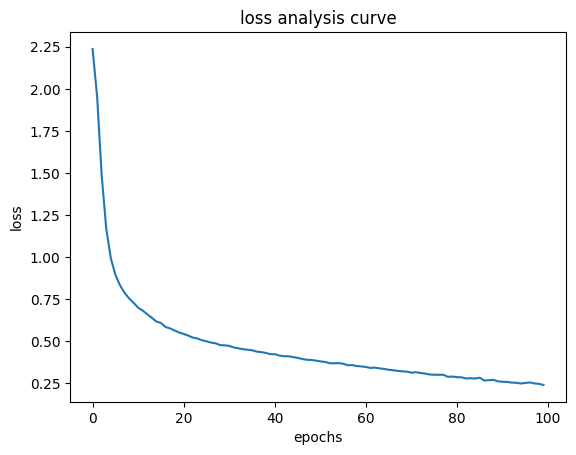

In [380]:
plt.plot(epochs_list,avg_loss_list)
plt.title('loss analysis curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()